# Analysis for the report

In [9]:
import os
import sys
import pickle
import networkx as nx
import matplotlib as mpl
import numpy as np
import random
import matplotlib.pyplot as plt
import re
from pprint import pprint
import pandas as pd
import seaborn as sns
# Add the project root directory to the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from ydata_profiling import ProfileReport

In [2]:
# Select the runs you want to load
for experiment in sorted(os.listdir('../results')):
    print('Experiment:', experiment)
    for run in sorted(os.listdir('../results/' + experiment)):
        print("     || Run:", run)
        
run_path = 'v0/2024-08-03'

Experiment: v0
     || Run: 2024-05-10
     || Run: 2024-05-14
     || Run: 2024-05-25
     || Run: 2024-05-27
     || Run: 2024-06-14
     || Run: 2024-07-18
     || Run: 2024-08-03
Experiment: v1
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v3
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v4
     || Run: 2024-05-10
     || Run: 2024-05-14
Experiment: v5
     || Run: 2024-05-14


In [3]:
# Read the file using pickle
with open(f'../results/{run_path}/embedded_index.pickle', 'rb') as f:
    embedded_index = pickle.load(f)

/Users/lukasalemu/Downloads/ls/envs/dissertation_rag/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [26]:
print(f'total number of documents is: {len(set([doc.metadata["file_name"] for doc in embedded_index]))}')

total number of documents is: 2


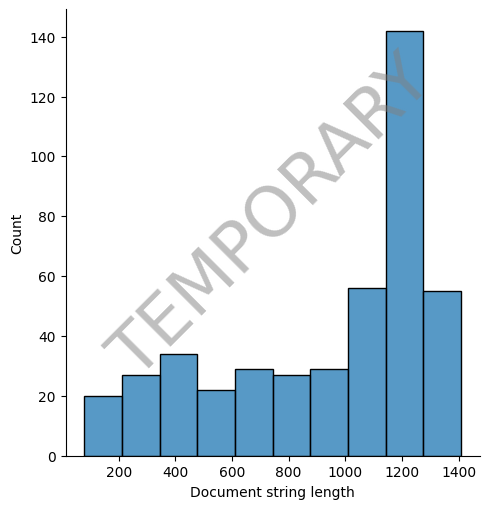

In [30]:
doc_lens = []
for doc_node in embedded_index:
    doc_lens.append(len(doc_node.text))

g = sns.displot(doc_lens, kde=False)

g.set(xlabel='Document string length', ylabel='Count')

# Add a watermark with TEMPORARY on it at an angle
g.figure.text(0.9, 0.9, 'TEMPORARY', fontsize=50, color='gray',
           ha='right', va='top', alpha=0.5, rotation=45);

## Get summary statistics of the documents in the corpus - maybe use yprofiling.


In [15]:
# Get summary statistics of the documents in the corpus - maybe use yprofiling.
metadata_doc = pd.read_excel(project_root + '/config/data_organisation.xlsx')

metadata_doc = metadata_doc.rename({
    'T': "Name"
}, axis=1).drop(
    columns=[
        'Tags',
        'Related Notes'
    ]
)

metadata_doc

,Name,Description,Type,Date,Authors,Topics,Brands,Academic Research Cited?,Divisions,MPC Round,Forecast Round
0,Monetary policy report November 2023,Our quarterly Monetary Policy Report sets out ...,MPR,2023-02-11,Bank of England,"Inflation, GDP, Labour Market, Forecasts",MPR,No,Monetary Analysis,Nov 2023,Nov 2023
1,Monetary policy report February 2024,The 2024 MPR from the Bank of England for the ...,MPR,2024-02-04,Bank of England,"Inflation, GDP, Labour Market, Forecasts",MPR,No,Monetary Analysis,Feb 2024,Feb 2024


In [19]:
report = ProfileReport(metadata_doc, title='Structured Metadata Profiling Report', sample=None)

In [20]:
report.to_file(project_root + '/data/03_output/metadata_profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# load the document index
with open(project_root + '/data/01_raw/document_index.pkl', 'rb') as f:
    document_index = pickle.load(f)